# Assignment 2

Read all instructions carefully

## Work Requirements

- You must work on Assignment 2 alone. You may not work with partners.
- You may use online resources (Stack Exchange, Googling, Regex cheat sheets), including documentation and everything on Canvas. However, you may not use an LLM (ChatGPT, Copilot, etc)
- Lightly document your code, especially any decisions you make along the way. You do not need extensive documentation. You do **NOT** need a separate README file. But a person should be able to read your submission top to bottom and understand what you're doing.

## Submission Instructions

- This assignment is due on **Monday, October 6 at 6:59pm**.
- The assignment must be submitted on Canvas as a single PDF file together with a requirements.txt file (as a text file, not PDF). The two files must be submitted as separate files, not as a zip file.
- The PDF file you submit must be named with the following format "lastname_firstname_assignment2.pdf"
- The requirements.txt file should only include the libraries you need to run your code in a Jupyter notebook, with their versions properly specified (e.g., use pip freeze with your venv activated)

## Recommendations and Resources

**Recommendation:** Complete the assignment in a Jupyter notebook, and then convert the notebook to a PDF. If you have too much trouble converting to PDF, then convert it to HTML, open it as HTML and export that page to PDF (but this is a less preferred option).

**Recommendation:** As always, start by examining the data you read in and understand it. What does each row represent in each dataframe?

**Helpful Documentation:**
- Pandas expanding: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html#pandas.DataFrame.expanding
- Python re library for Regex: https://docs.python.org/3/library/re.html
- Pareto: https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html#numpy.random.pareto
- Gaussian: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal
- Seaborn Boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html
- Seaborn Scatterplot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- Matplotlib scatterplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- Matplotlib boxplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#

# Part 0 - Imports and CoW

In [78]:
from pathlib import Path
import pandas as pd  # need to import pandas first.
import re

# Enforce Copy-on-Write
pd.set_option("mode.copy_on_write", True)

In [141]:
# Import libraries
import numpy as np
# import pandas as pd  -- imported above to run pd.set_option
# import matplotlib.pyplot as plt
import seaborn as sns
# import re

In [80]:
# set standard paths
cwd = Path().cwd() #set our cwd
project_folder = cwd.parent #set our project folder as the cwd parent

# Part 1 - Regex, EDA, and Visualization

Load the Food Safety datasets (bus.csv, ins2vio.csv, ins.csv, and vio.csv) into pandas dataframes and answer the following questions based on the dataframes.

In [ ]:
#Load the datasets into Pandas DataFrames

# df that holds the info regarding the buinesses
bus_dataset_path = Path('data/bus.csv') #using a data folder makes life easier
bus_file = project_folder / bus_dataset_path #join the project folder with the dataset path
if not bus_file.exists():
	raise FileNotFoundError(f"Dataset file not found: {bus_file}")

# df that holds the info regarding the inspections
ins_dataset_path = Path('data/ins.csv') #using a data folder makes life easier
ins_file = project_folder / ins_dataset_path #join the project folder with the dataset path
if not ins_file.exists():
	raise FileNotFoundError(f"Dataset file not found: {ins_file}")

# df that holds the relation from inspection to violation
ins2vio_dataset_path = Path('data/ins2vio.csv') #using a data folder makes life easier
ins2vio_file = project_folder / ins2vio_dataset_path #join the project folder with the dataset path
if not ins2vio_file.exists():
	raise FileNotFoundError(f"Dataset file not found: {ins2vio_file}")

# df that holds the info regarding the violations
vio_dataset_path = Path('data/vio.csv') #using a data folder makes life easier
vio_file = project_folder / vio_dataset_path #join the project folder with the dataset path
if not vio_file.exists():
	raise FileNotFoundError(f"Dataset file not found: {vio_file}")

business = pd.read_csv(bus_file)
inspection = pd.read_csv(ins_file)
insp2vio = pd.read_csv(ins2vio_file)
violation = pd.read_csv(vio_file)

Use the business dataset (bus) to answer the first few questions below

1.1) Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)?

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.

In [ ]:
# compare the number of elements in column with the number of unique elements in the column
is_unique = business['business id column'].unique().size == business['business id column'].size
print('The entries in the bid column of the bus file are unique: ', is_unique)

The entries in the bid column of the bus file are unique:  True


In [83]:
# take a peek at the dataframe
business.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


In [84]:
# take a look at the columns of the business dataframe
business.columns

Index(['business id column', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'phone_number'],
      dtype='object')

In [85]:
#
business.describe()

,business id column,latitude,longitude,phone_number
count,6253.000000,6253.000000,6253.000000,6.253000e+03
mean,60448.948984,-5575.337966,-5645.817699,4.701819e+09
std,36480.132445,4983.390142,4903.993683,6.667508e+09
min,19.000000,-9999.000000,-9999.000000,-9.999000e+03
25%,18399.000000,-9999.000000,-9999.000000,-9.999000e+03
50%,75685.000000,-9999.000000,-9999.000000,-9.999000e+03
75%,90886.000000,37.776494,-122.421553,1.415533e+10
max,102705.000000,37.824494,0.000000,1.415988e+10


In [86]:
business.dtypes

business id column      int64
name                   object
address                object
city                   object
state                  object
postal_code            object
latitude              float64
longitude             float64
phone_number            int64
dtype: object

1.2) In the two cells below create the following **two numpy arrays**:

1. Assign `top_names` to the top 5 most frequently used business names, from most frequent to least frequent.
2. Assign `top_addresses` to the top 5 addressses where businesses are located, from most popular to least popular.

Hint: you may find `value_counts()` helpful. 

In [87]:
# store the names with the 5 highest value counts as a numpy array top_names (value_counts returns a Series, names are the index)
top_names = np.array(business['name'].value_counts().head().index) 
# store the addresses with the 5 highest value counts as a numpy array top_names (value_counts returns a Series, addresses are the index)
top_addresses = np.array(business['address'].value_counts().head().index)


1.3) Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column named `postal5` in the original bus dataframe which contains only the first 5 digits of the postal_code column. Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.

In [88]:
# manually explore postal_code column because it is not numeric
business['postal_code'].value_counts()

postal_code
94103         562
94110         555
94102         456
94107         408
94133         398
             ... 
94124-1917      1
94102-5917      1
94105-2907      1
95112           1
94123-3106      1
Name: count, Length: 63, dtype: int64

In [89]:
business['postal_code'].min()

'-9999'

In [90]:
# take a look at the unique postal codes to try and find special MISSING ZIP code value
business['postal_code'].unique()

array(['94110', '94133', '94103', '94124', '94123', '94118', '94121',
       '94134', '94114', '94109', '94102', '94132', '94116', '-9999',
       '94107', '94105', '94108', '94117', '94158', '94112', '94127',
       '94105-1420', '94111', '94122', '94115', '94104', '94122-1909',
       '94131', '94117-3504', '94518', '95105', '94013', '94130',
       '941102019', '941', '941033148', 'CA', '92672', '94120', '94143',
       '94101', '94014', '94129', '94602', 'Ca', '94080', '00000',
       '94188', '64110', '94544', '94301', '94901', '95117', '95133',
       '95109', '95132', '95122', '94621', '94124-1917', '94102-5917',
       '94105-2907', '95112', '94123-3106'], dtype=object)

In [91]:
# 1.3) Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid 
# postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column 
# named `postal5` in the original bus dataframe which contains only the first 5 digits of the 
# postal_code column. Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.

########################################

# add the column postal5 as a copy of postal_code
## business['postal5'] = business['postal_code']

# if the value of postal5 is not '-9999' replace it with the first 5 digits
# business['postal5'] != '-9999'
## business['postal5'] = business[business['postal5'] != '-9999']['postal5'].str[:5]
## business[business['postal5'] == '-9999']['postal5'].str.replace(business['postal5'], 'None')
# pattern_pc = r"([0-9]{5})"
# business['postal5'] = business['postal_code'].str[:5]
# business[business['postal_code'].str.len() > 5]
# business['postal_code'].is_na
# ismissing = business['postal_code'] == '-9999'
## isNone = business['postal5'] == 'None'
## isNone.value_counts()

########################3#########

# look at the business that DO NOT have the special MISSING ZIP code value (-9999)
# look at the unique values to see what we may have that is not the missign zip value and is not likely a valid zip
business[business['postal_code'] != '-9999']['postal_code'].unique()


array(['94110', '94133', '94103', '94124', '94123', '94118', '94121',
       '94134', '94114', '94109', '94102', '94132', '94116', '94107',
       '94105', '94108', '94117', '94158', '94112', '94127', '94105-1420',
       '94111', '94122', '94115', '94104', '94122-1909', '94131',
       '94117-3504', '94518', '95105', '94013', '94130', '941102019',
       '941', '941033148', 'CA', '92672', '94120', '94143', '94101',
       '94014', '94129', '94602', 'Ca', '94080', '00000', '94188',
       '64110', '94544', '94301', '94901', '95117', '95133', '95109',
       '95132', '95122', '94621', '94124-1917', '94102-5917',
       '94105-2907', '95112', '94123-3106'], dtype=object)

In [92]:
#Create a new column  named `postal5` in the original bus dataframe which contains only the first 5 digits of the 
# postal_code column. 
business['postal5'] = business['postal_code'].str[:5]
business
business[business['postal_code'].str.len() > 5]

# check to see if anything weird happened when we stored just the first 5 digits of postal_code in postal5
business['postal5'].unique()

# #Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.
# replace the zip codes that contanin the missing zip code value with 'None'
business['postal5'] = business['postal5'].str.replace('-9999', 'None', regex = True)

business['postal5'].unique()

array(['94110', '94133', '94103', '94124', '94123', '94118', '94121',
       '94134', '94114', '94109', '94102', '94132', '94116', 'None',
       '94107', '94105', '94108', '94117', '94158', '94112', '94127',
       '94111', '94122', '94115', '94104', '94131', '94518', '95105',
       '94013', '94130', '941', 'CA', '92672', '94120', '94143', '94101',
       '94014', '94129', '94602', 'Ca', '94080', '00000', '94188',
       '64110', '94544', '94301', '94901', '95117', '95133', '95109',
       '95132', '95122', '94621', '95112'], dtype=object)

In [ ]:
# investigate the other odd values returned : 'CA', 'Ca', '00000', '941' not 5 digits
pattern = r'^[0-9]{5}'
business[~business['postal5'].str.match(pattern)] 
business[(business['postal5'] != 'None') & (~business['postal5'].str.match(pattern))] 


,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
1824,5208,GOLDEN GATE YACHT CLUB,1 YACHT Rd,San Francisco,CA,941,37.807878,-122.442499,14155342628,941
2409,64540,Leo's Hot Dogs,2301 Mission St,San Francisco,CA,CA,37.760054,-122.419166,14155774013,CA
2418,64738,Japacurry,Public,San Francisco,CA,CA,37.777122,-122.419639,-9999,CA
4576,88139,Tacolicious,2250 Chestnut St,San Francisco,CA,Ca,-9999.000000,-9999.000000,14155646077,Ca


*I am not familiar enough with San Francisco or the zip code lat/ long areas to be able to speculate the correct zip codes here.  May be solved with a quick google for each restaurant and address, or go back to the source, but for now it would not be accurate to replace these postal codes with "None" because they were not missing.*

Now using the four Food Safety datasets bus.csv, ins2vio.csv, ins.csv, and vio.csv:

1.5) Create a side-by-side boxplot that shows the distribution of the restaurant scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

Hint: Consider using appropriate JOIN operations.

<Axes: xlabel='risk_category', ylabel='score'>

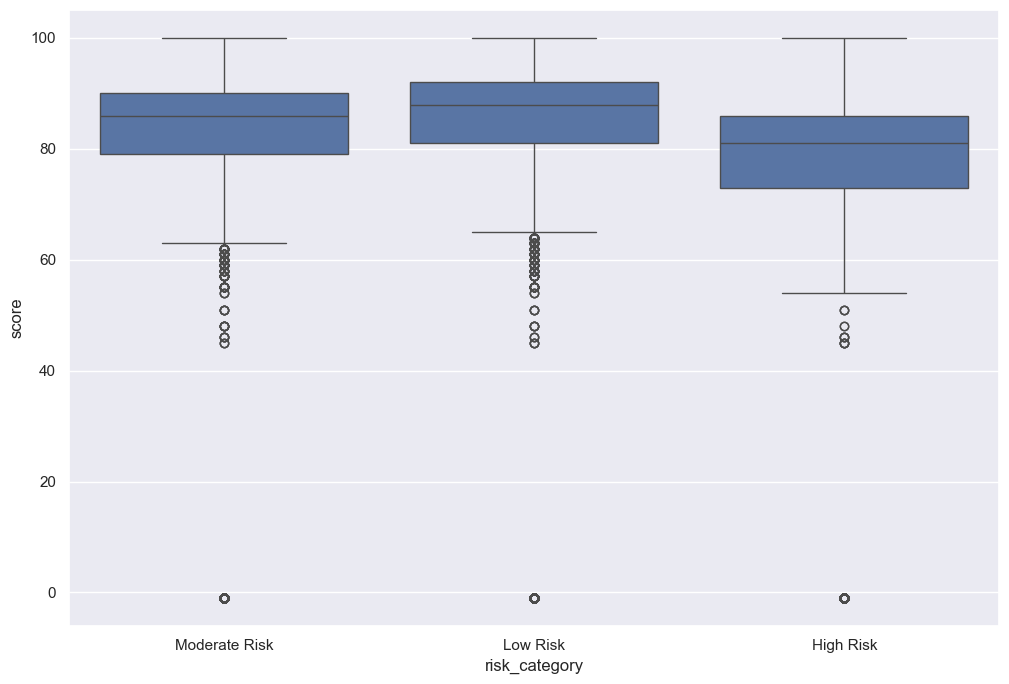

In [ ]:
#SELECT
# i.score,
# v.risk_category
#FROM
#viol v
#INNER JOIN
# ins2vio i2v  ON v.vid = i2v.vid
# INNER JOIN
# ins i IN i2v.iid=i.iid
score_dist_2017to2019 = insp2vio.merge(inspection, how='left')
score_dist_2017to2019
score_dist_2017to2019[score_dist_2017to2019['iid'] == '1000_20171002']
score_dist_2017to2019 = score_dist_2017to2019.merge(violation)
score_dist_2017to2019

score_dist_2017to2019 = score_dist_2017to2019[score_dist_2017to2019['date'].str.match(r'[0-1][0-9]/[0-3][0-9]/201[7-9]')]
#WHERE
#need to filter dates from 2017-2019
sns.set(rc={"figure.figsize":(12, 8)}) #width=12, #height=8
bp_data = score_dist_2017to2019 #[['risk_category', 'score', 'date']]
bp_x = score_dist_2017to2019['risk_category']
bp_y = score_dist_2017to2019['score']
#score_dist_2017to2019[['risk_category', 'score', 'date']]
sns.boxplot(data = bp_data, x = bp_x, y = bp_y)



# Part II - Making a Synthetic Dataset

In this part you're going to be create a synthetic dataset (dataframe) with 1000 observations (rows). You are going to use random number generators to create the data for you.

You can use either the numpy or scipy library, whichever you find easier. Be sure to import any libraries you use at the top of the ntoebook (not down here).

In [182]:
# number of random numbers to generate (instructions say 1000, n is initilized with 10,000 ?)
n = 10000
rng = np.random.default_rng()
syndata = rng.random(n)
syndata

array([0.89977625, 0.95396648, 0.34340943, ..., 0.30615173, 0.91026876,
       0.08943395], shape=(10000,))

In [183]:
#Optional: set random seed for reproducibility (how you do it depends on whether yo uuse numpy or scipy to generate the random numbers)

# create a new random number generator seeded with the number 42 for reproducibility and store it in rng_seeded
rng_seeded = np.random.default_rng(seed=42)
# generate n "random" numbers
syndata_seeded = rng_seeded.random(n)
syndata_seeded


array([0.77395605, 0.43887844, 0.85859792, ..., 0.16534697, 0.3734104 ,
       0.48090777], shape=(10000,))

2.1) Create a variable "v1" of 10,000 numbers where y = 3x+4 is the value of the element at index x, i.e., [4, 7, 10, ...] (Done for you)

In [177]:
v1 = 3 * np.arange(n) + 4
v1

array([    4,     7,    10, ..., 29995, 29998, 30001], shape=(10000,))

2.2) Create a list of 10,000 samples from a normal (Gaussian) distribution with mean = 0 and variance = 10.

HINT: Pay attention to whether the argument to your number generator is variance or standard deviation. (It doesn't have to be a python list, it can be an array or dataframe, or whatever dtype is most convenient for you.)

In [ ]:
# noise = np.random.normal... (can also use scipy)
# of values to generate 
n = 10000
# desired mean
m = 0
# desired variance 
v = 10

# create a new random number generator
rng_normal = np.random.default_rng()
# generate noise given the parameters above
noise = rng_normal.normal(m, v, n)
noise

array([-4.32337913, -5.43100899,  7.95548151, ..., 16.31051942,
       -9.36412264, -0.38593616], shape=(10000,))

2.3) Create a variable v2 = v1 + Gaussian noise, using the noise your created above

In [198]:
# v2 = v1 + noise
v2 = v1 + noise

2.4) Create a variable v3 = exp(v1) that exponentiates the libear variable in v1, also sometimes denoted e^(v1), e.g., v3[0] = e^4

In [196]:
#v3 = 
v3 = np.exp(v1)
v3

C:\Users\robin\AppData\Local\Temp\ipykernel_32940\2071923852.py:2: RuntimeWarning: overflow encountered in exp
  v3 = np.exp(v1)


array([   54.59815003,  1096.63315843, 22026.46579481, ...,
                  inf,            inf,            inf], shape=(10000,))

In [194]:
np.exp(7)

np.float64(1096.6331584284585)

2.5) Create a list v4 = exp(v1) + Gaussian noise, using the same noise variable you created earlier

In [201]:
#v4 = 
v4 = np.exp(v1) + noise
v4

C:\Users\robin\AppData\Local\Temp\ipykernel_32940\2525642452.py:2: RuntimeWarning: overflow encountered in exp
  v4 = np.exp(v1) + noise


array([   50.2747709 ,  1091.20214944, 22034.42127632, ...,
                  inf,            inf,            inf], shape=(10000,))

2.6) Create a list v5 = exp(v1 + Gaussian noise), using the same noise variable you created earlier

In [202]:
# v5 = 
v5 = np.exp(v1 + noise)
v5

C:\Users\robin\AppData\Local\Temp\ipykernel_32940\2145815808.py:2: RuntimeWarning: overflow encountered in exp
  v5 = np.exp(v1 + noise)


array([7.23699423e-01, 4.80180077e+00, 6.28009972e+07, ...,
                  inf,            inf,            inf], shape=(10000,))

2.7) Create a dataframe with 10,000 rows and columns = [v1, v2, v3, v4, v5, noise]

In [206]:
# df_full = ...
df_full = pd.DataFrame(v1, v2, v3, v4, v5, noise)
df_full

TypeError: DataFrame.__init__() takes from 1 to 6 positional arguments but 7 were given

2.8) For each variable (v2, v3, v4, v5) create a separate scatter plot with v1 on the x-axis. Remark on your general observations.

In [103]:
# Code for plots here, and remarks and observations here

2.9)  Create pair of boxplots with v4 and v5 next to each other. Remark on how v4 and v5 compare, based on the violin plots and the scatter plots. You may use other plots or tools if helpful.

## Part III - Sampling and Convergence

3.1) Create a variable "pareto" that is a list of 10,000 samples from a Pareto distribution with shape parameter = 1.2 (usually denoted a or alpha). Add this list "pareto" as a column to your dataframe from Part II

In [104]:
#pareto = np.random.pareto... (can also use scipy)

3.2) Add two more columns to your dataframe labeled "running_avg_normal" and "running_avg_pareto". In the "running_avg_normal" column put the running average of the (unsorted) values in the noise column. For example, if the values in the noise column are [0.1, 0.3, 0.5, ...] then the running average should be [0.1, 0.2, 0.3, ...]. Do the same for the Pareto column.

HINT: Check out the .expanding() and .mean() methods for pandas Series objects

3.3) Create a lineplot for running_avg_normal and a lineplot for running_avg_Pareto. Remark on your observations.